# Importing Library

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import re
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import distance
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import spacy 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
import mlflow
import os

### Importing data set

In [5]:
data = pd.read_csv('train.csv')
data = data.head(200000)

In [6]:
data.shape

(200000, 6)

In [7]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


- we have 6 columns with columns name : ('id','qid1','qid2','question1','question2','is_duplicate')

In [8]:
print('shape of dataset',data.shape)

shape of dataset (200000, 6)


## Checking the null value

In [9]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

- we have 3 null value , 1 null in question1 and 2 null value in question2

In [10]:
## showing the null value rows
## droping null data rows or fillna value

def null_data_pre(data,flag):
    
    if 1<=data.isnull().sum().sum():
        print(data.isnull().sum())
        print('-'*50)
        nan_row = data[data.isnull().any(1)]
        print(nan_row)
        print('-'*50)
        if flag == 'del':
            file = data.dropna()
        else:
            file = data.fillna(flag)
        return file
    else:
        print('data_set has no null value')

In [11]:
### checking the null value in data set and filling with ' ' 

In [12]:
null_data_pre(data,flag = ' ')

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64
--------------------------------------------------
            id    qid1    qid2                       question1 question2  \
105780  105780  174363  174364  How can I develop android app?       NaN   

        is_duplicate  
105780             0  
--------------------------------------------------


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
199995,199995,250170,43219,Why was the Battle of Vimy Ridge so important?,What is the significance of the Battle of Vimy...,1
199996,199996,281111,301626,Which of these TV shows should I watch next?,What are some thriller shows I should watch next?,0
199997,199997,301627,301628,Should I change my name?,Should I legally change my first name?,0
199998,199998,203260,211126,Should I buy the new MacBook 2016 or one from ...,Should I buy the new MacBook pro 2016 or the M...,1


### Checking if dataset is balanced or imbalanced

In [13]:
print('-->> Question pairs are not Similar (is_duplicate = 0):\n     {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('-->> Question pairs are Similar (is_duplicate = 1):\n     {}%'.format(round(data['is_duplicate'].mean()*100, 2)))


-->> Question pairs are not Similar (is_duplicate = 0):
     62.76%
-->> Question pairs are Similar (is_duplicate = 1):
     37.24%


In [14]:
# duplicate rows
data.duplicated().sum()

0

 - we don't have duplicate pair of data in  dataset

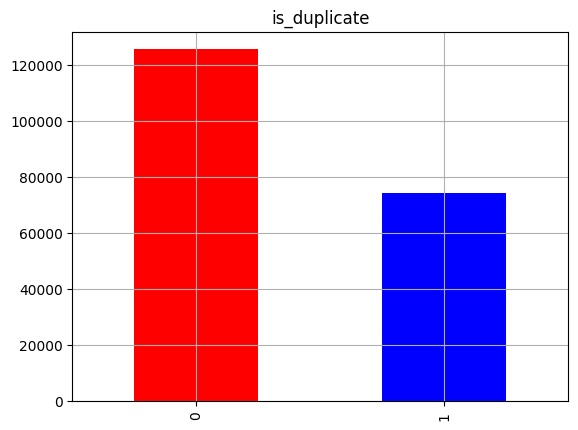

In [15]:
# creating bar plot to check the data distribution 
data.is_duplicate.value_counts().plot.bar(color=['red','blue'])
plt.title('is_duplicate')
plt.grid()

- non repeated question   : 255027
- repeated question : 149263

### number of unique Questions

In [16]:
qids = pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
unique_qs = len(np.unique(qids))

In [17]:
unique_qs = len(np.unique(qids))
repeated = np.sum(qids.value_counts()>1)
max_repeated = max(qids.value_counts())
print('Number of Unique questions {} \nNo of repeated questions: {} \nMax repeated:{}'.format(unique_qs,repeated,max_repeated))

Number of Unique questions 301630 
No of repeated questions: 47905 
Max repeated:68


In [18]:
# showing how many question repeted how many time
qids.value_counts() 

2559      68
4044      57
30782     54
17978     43
2561      37
          ..
224130     1
224131     1
224133     1
224135     1
301630     1
Length: 301630, dtype: int64

Text(0, 0.5, 'Number of question')

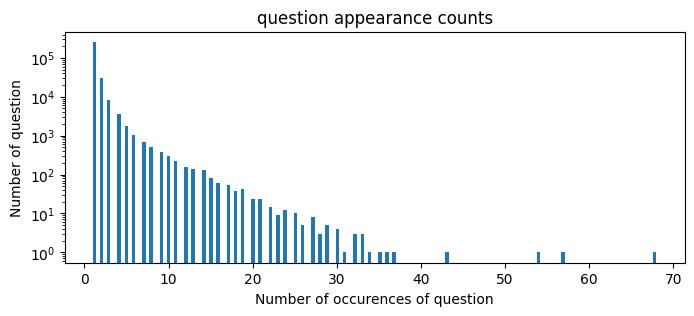

In [19]:
# Number of occurences of each Question
plt.figure(figsize=(8,3))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log')
plt.title('question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of question')


- in hist plot we are getting how many question repeated most of the time

Text(0.5, 1.0, 'unique vs repeated')

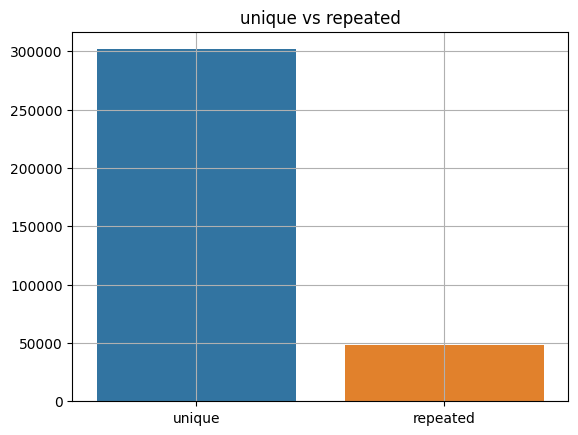

In [20]:
# showing bar plot to check the unique and repeated value 
sns.barplot(y=[unique_qs,repeated],x=['unique','repeated'])
plt.grid()
plt.title('unique vs repeated')

- Number of Unique questions 537933 
- No of repeated questions: 111780 

In [21]:
# checking whether there are any repeated pair of questions
pair_duplicates = data[['qid1','qid2','question1','question2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
pair_duplicates.head()

,qid1,qid2,question1,question2,is_duplicate
0,1,2,1,1,1
1,3,4,1,1,1
2,3,282170,1,1,1
3,4,32881,1,1,1
4,5,6,1,1,1


- we don't have any repeated pair of question

## Text preprocessing

In [22]:
Stopword = stopwords.words('english')
Stopword.remove('no')
Stopword.remove('not')
stopwords= set(Stopword)

In [23]:
# funation for text preprocessing (Expanding contractions )
def preprocess_text(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub('\W', ' ', x) 
    bfs = BeautifulSoup(x) # removing html tage form the text
    x = bfs.get_text()
    x = x.strip()
    return x

## Word clould

In [24]:
df_duplicate = data[data['is_duplicate'] == 1]
dfp_nonduplicate = data[data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

Number of data points in class 1 (duplicate pairs) : 148950
Number of data points in class 0 (non duplicate pairs) : 251050


Word Cloud for Duplicate Question pairs


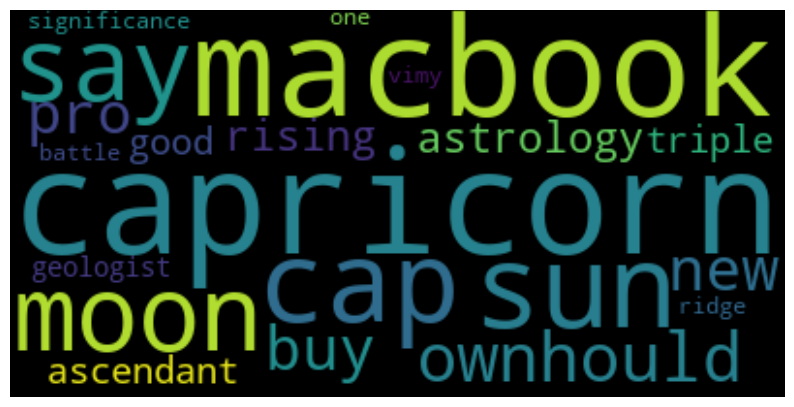

In [25]:
textp_w = preprocess_text(p)

stopwords 
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non Duplicate Question pairs


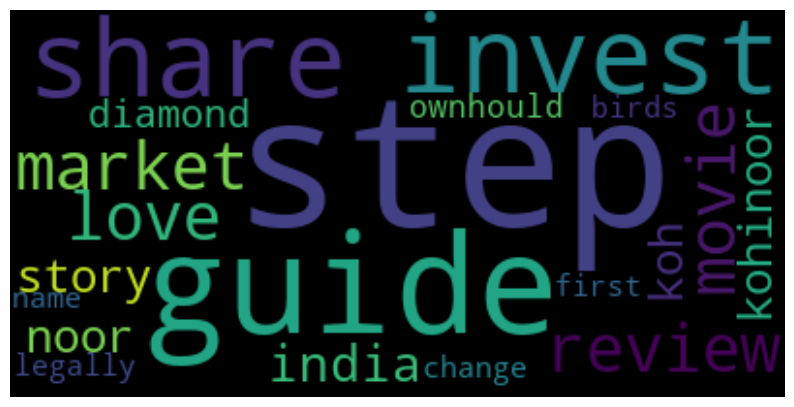

In [26]:
textn_w = preprocess_text(n)
plt.figure(figsize=(10,8))
stopwords 
wc = WordCloud(background_color="black", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
print ("Word Cloud for non Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### performing data cleaning and stemming(removing punchuation marks and Expanding contractions )

In [27]:
# function for performing data cleaning (removing stop_words, lower the text and perfome stemming or lemmitaization )
def data_cleaning(data):
    data['question1'] = data.question1.apply(preprocess_text)
    data['question2'] = data.question2.apply(preprocess_text)
    return data

In [28]:
clean_data = data_cleaning(data)

In [29]:
clean_data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0
5,5,11,12,astrology i am a capricorn sun cap moon and c...,i am a triple capricorn sun moon and ascenda...,1
6,6,13,14,should i buy tiago,what keeps childern active and far from phone ...,0
7,7,15,16,how can i be a good geologist,what should i do to be a great geologist,1
8,8,17,18,when do you use シ instead of し,when do you use instead of and,0
9,9,19,20,motorola company can i hack my charter moto...,how do i hack motorola dcx3400 for free internet,0


- remove all type of puchuation markes and html tagges for dataset 

### Removing Stopword and performing stemming or lemmatizer

In [30]:
# function removing stopword and stemming or lemmatizer
def removing_stopword(data, flag):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    data = data.split()
    if flag == 'stem':
        x = [stemmer.stem(word) for word in data if word not in stopwords]
        x = ' '.join(x)
    elif flag =='lemm':
        x = [lemmatizer.lemmatize(word) for word in data if word not in stopwords]
        x = ' '.join(x)
    x = x.strip()
    return x

- STEMMING => natural -> natur
- LEMMITIZATION => natural -> nature

In [31]:
# performing stemming in qusetion1 and question2 
stem_data = pd.DataFrame()
stem_data['stem_question1'] = clean_data.question1.apply(removing_stopword,flag = 'stem')
stem_data['stem_question2'] = clean_data.question2.apply(removing_stopword,flag = 'stem')
stem_data.head(5)

,stem_question1,stem_question2
0,step step guid invest share market india,step step guid invest share market
1,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...
2,increas speed internet connect use vpn,internet speed increas hack dn
3,mental lone solv,find remaind math 23 24 math divid 24 23
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water


In [32]:
#comparision of Raw data and Cleaned data 
compair_data = pd.concat([data[['question1','question2']],stem_data],axis=1)
compair_data.head()

,question1,question2,stem_question1,stem_question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,step step guid invest share market india,step step guid invest share market
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,increas speed internet connect use vpn,internet speed increas hack dn
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,mental lone solv,find remaind math 23 24 math divid 24 23
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,one dissolv water quikli sugar salt methan car...,fish would surviv salt water


- we can see the question comparison 

## Pos tagging

In [33]:
# POS Taggging
def Pos_tagging(data):
   
    # Word tokenizers is used to find the words and punctuation in a string
    wordsList = nltk.word_tokenize(data)
    #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
    return tagged

In [34]:
%%time
# performing pos tagging and coverting question to part of speach
stem_data['pos_tag_que1'] = compair_data.question1.apply(Pos_tagging)
stem_data['pos_tag_que2'] = compair_data.question2.apply(Pos_tagging)

CPU times: total: 14min 59s
Wall time: 15min 2s


In [35]:
stem_data.head()

,stem_question1,stem_question2,pos_tag_que1,pos_tag_que2
0,step step guid invest share market india,step step guid invest share market,"[(what, WP), (is, VBZ), (the, DT), (step, NN),...","[(what, WP), (is, VBZ), (the, DT), (step, NN),..."
1,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,"[(what, WP), (is, VBZ), (the, DT), (story, NN)...","[(what, WP), (would, MD), (happen, VB), (if, I..."
2,increas speed internet connect use vpn,internet speed increas hack dn,"[(how, WRB), (can, MD), (i, VB), (increase, VB...","[(how, WRB), (can, MD), (internet, VB), (speed..."
3,mental lone solv,find remaind math 23 24 math divid 24 23,"[(why, WRB), (am, VBP), (i, JJ), (mentally, RB...","[(find, VB), (the, DT), (remainder, NN), (when..."
4,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,"[(which, WDT), (one, CD), (dissolve, NN), (in,...","[(which, WDT), (fish, NN), (would, MD), (survi..."


## Lemmetization

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
lemm_data = pd.DataFrame()
lemm_data['id']= clean_data.id
lemm_data['lemm_question1'] = clean_data.question1.apply(removing_stopword,flag = 'lemm')
lemm_data['lemm_question2'] = clean_data.question2.apply(removing_stopword,flag = 'lemm')
lemm_data.head(5)

,id,lemm_question1,lemm_question2
0,0,step step guide invest share market india,step step guide invest share market
1,1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
2,2,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,mentally lonely solve,find remainder math 23 24 math divided 24 23
4,4,one dissolve water quikly sugar salt methane c...,fish would survive salt water


- we remove the punchuation markes and html tagges and perfoming lammetization on data_set 

In [39]:
be_data = pd.read_csv('train.csv',usecols=['id','qid1','qid2','is_duplicate'])
be_data.head(5)

,id,qid1,qid2,is_duplicate
0,0,1,2,0
1,1,3,4,0
2,2,5,6,0
3,3,7,8,0
4,4,9,10,0


## Merging the lemmitize question with the 'id','qid1','qid2','is_dumplicate'

In [40]:
lemm_data = lemm_data.merge(be_data,how='left',on='id')
lemm_data.head()

,id,lemm_question1,lemm_question2,qid1,qid2,is_duplicate
0,0,step step guide invest share market india,step step guide invest share market,1,2,0
1,1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,3,4,0
2,2,increase speed internet connection using vpn,internet speed increased hacking dns,5,6,0
3,3,mentally lonely solve,find remainder math 23 24 math divided 24 23,7,8,0
4,4,one dissolve water quikly sugar salt methane c...,fish would survive salt water,9,10,0


# Feature Extraction

In [41]:
def doesMatch (q, match):
    q1, q2 = q['question1'], q['question2']
    q1 = str(q1).split()
    q2 = str(q2).split()
    if len(q1)>0 and len(q2)>0 and q1[match]==q2[match]:
        return 1
    else:
        return 0

In [42]:
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)


- Token: You get a token by splitting sentence a space
- Stop_Word : stop words as per NLTK.
- Word : A token that is not a stop_word

 ### Features:

- common_word : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))

- common_word_ratio : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))

- common_stop_word_ratio_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))

- common_stop_word_ratio_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))

- common_word_ratio_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))


- common_word_ratio_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))


- same_last_word : Check if Last word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])


- same_first_word : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])

In [43]:
pd.options.display.max_columns=None

In [44]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [45]:
# Get the common stopwords from Question pair
def common_stop_words_ratio(q,value):
    q1_tokens =str( q.question1).split()
    q2_tokens = str(q.question2).split()
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stopwords])
    q2_stops = set([word for word in q2_tokens if word in stopwords])
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    if value == 'min':
        token_features = common_stop_count / (min(len(q1_stops), len(q2_stops)) + 0.0001)
    elif value == 'max':
        token_features = common_stop_count / (max(len(q1_stops), len(q2_stops)) + 0.0001)
    return token_features

In [46]:
def feature_extract(data):
    print('feature_extraction_start.....')
    data['len_q1'] = data.question1.str.len()
    data['len_q2'] = data.question2.str.len()
    data['q1_word'] = data.question1.apply(lambda x: len(str(x).split(' ')))
    data['q2_word'] = data.question2.apply(lambda x: len(str(x).split(' ')))
    
    data['total_word'] = data['q1_word'] + data['q2_word']
    data['differ_word_num'] = abs(data['q1_word'] - data['q2_word'])
    data['same_first_word'] = data.apply(lambda x: doesMatch(x, 0) ,axis=1)
    data['same_last_word'] = data.apply(lambda x: doesMatch(x, -1) ,axis=1)
    data['total_unique_word'] = data.apply(lambda x: len(set(str(x.question1).split()).union(set(str(x.question2).split()))) ,axis=1)
    data['total_unique_word_withoutstopword_num'] = data.apply(lambda x: len(set(str(x.question1).split()).union(set(str(x.question2).split())) - set(stopwords)) ,axis=1)
    data['total_unique_word_num_ratio'] = data['total_unique_word'] / data['total_word']
    print('......')
    data['common_word'] = data.apply(lambda x: len(set(str(x.question1).split()).intersection(set(str(x.question2).split()))) ,axis=1)
    data['common_word_ratio'] = data['common_word'] / data['total_unique_word'] # word share
    data['word_share'] = data['common_word']/data['total_word']
    data['common_word_ratio_min'] = data['common_word'] / data.apply(lambda x: min(len(set(str(x.question1).split())), len(set(str(x.question2).split()))) ,axis=1) 
    data['common_word_ratio_max'] = data['common_word'] / data.apply(lambda x: max(len(set(str(x.question1).split())), len(set(str(x.question2).split()))) ,axis=1) 
    
    data['common_stop_word_ratio_min'] = common_stop_words_ratio(data,'min')
    data['common_stop_word_ratio_max'] = common_stop_words_ratio(data, 'max')
    
    data['common_word_withoutstopword'] = data.apply(lambda x: len(set(str(x.question1).split()).intersection(set(str(x.question2).split())) - set(stopwords)) ,axis=1)
    data['common_word_withoutstopword_ratio'] = data['common_word_withoutstopword'] / data['total_unique_word_withoutstopword_num']
    
    data['common_word_withoutstopword_ratio_min'] = data['common_word_withoutstopword'] / data.apply(lambda x: min(len(set(str(x.question1).split()) - set(stopwords)), len(set(str(x.question2).split()) - set(stopwords))) ,axis=1) 
    data['common_word_withoutstopword_ratio_max'] = data['common_word_withoutstopword'] / data.apply(lambda x: max(len(set(str(x.question1).split()) - set(stopwords)), len(set(str(x.question2).split()) - set(stopwords))) ,axis=1) 
    
    print('fuzzy features...')
    print('fuzz_ratio.....')
    data["fuzz_ratio"] = data.apply(lambda x: fuzz.ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_partial_ratio.....')
    data["fuzz_partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_token_set_ratio.....')
    data["fuzz_token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_token_sort_ratio.....')
    data["fuzz_token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('longest_substr_ratio.....')
    data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(str(x.question1), str(x.question2)), axis=1)
    data.fillna(0, inplace=True)
    return data

In [47]:
cl_df = clean_data

In [48]:
cl_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [49]:
# performing feature Extraction 
if os.path.isfile('extract_feature.csv'):
    df = pd.read_csv("extract_feature.csv",encoding='latin-1')
else:
    print("Extracting features for train.....")
    df = feature_extract(cl_df)
    df.to_csv("extract_feature.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,q1_word,q2_word,total_word,differ_word_num,same_first_word,same_last_word,total_unique_word,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word,common_word_ratio,word_share,common_word_ratio_min,common_word_ratio_max,common_stop_word_ratio_min,common_stop_word_ratio_max,common_word_withoutstopword,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,0.423077,1.0,0.916667,0.749996,0.652171,5,0.833333,1.0,0.833333,93,100,100,93,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,29,5,1,0,17,11,0.586207,7,0.411765,0.241379,0.7,0.500000,0.749996,0.652171,4,0.363636,0.8,0.400000,66,74,86,63,0.588235


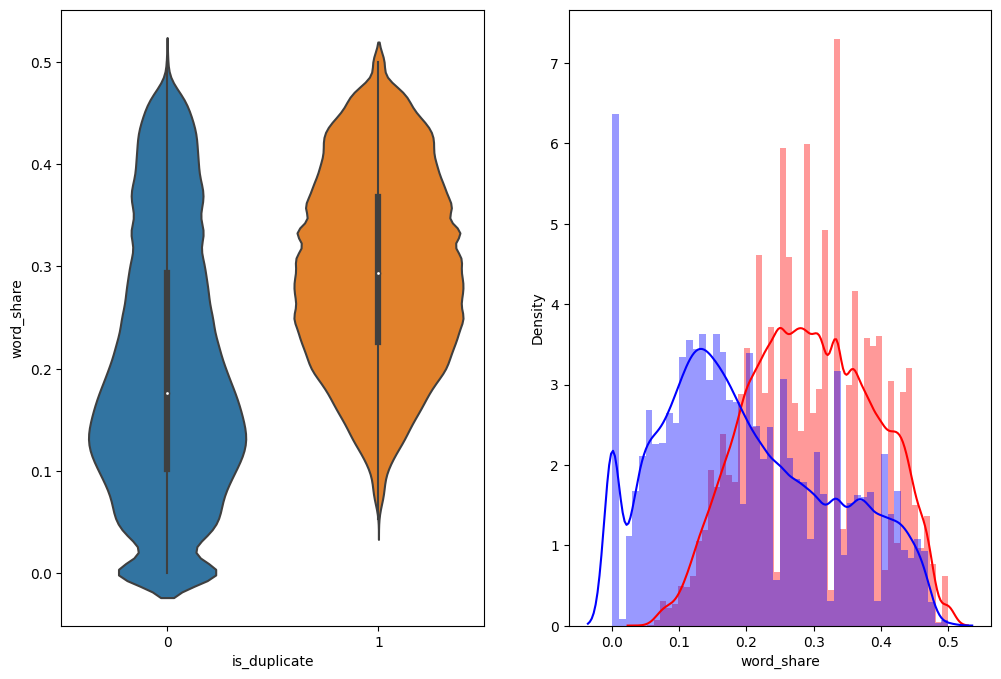

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

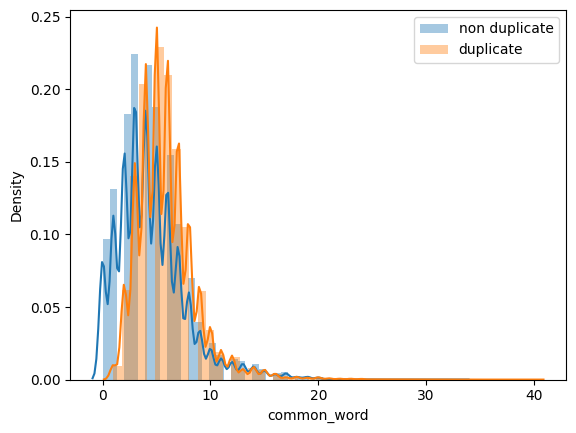

In [51]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['common_word'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['common_word'],label='duplicate')
plt.legend()
plt.show()

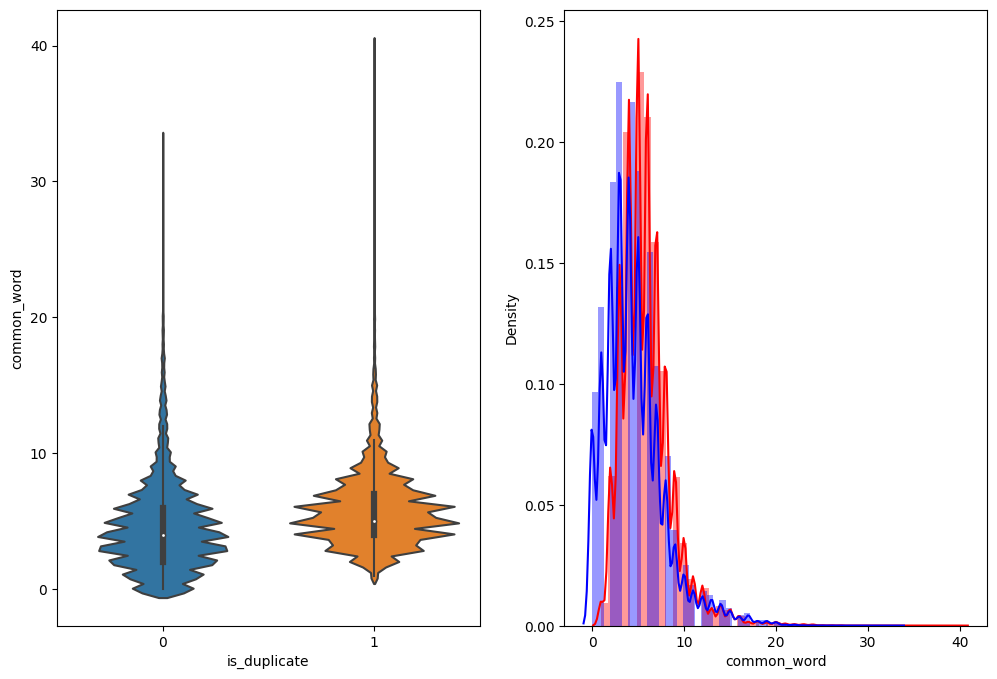

In [52]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'common_word', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['common_word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['common_word'][0:] , label = "0" , color = 'blue' )
plt.show()

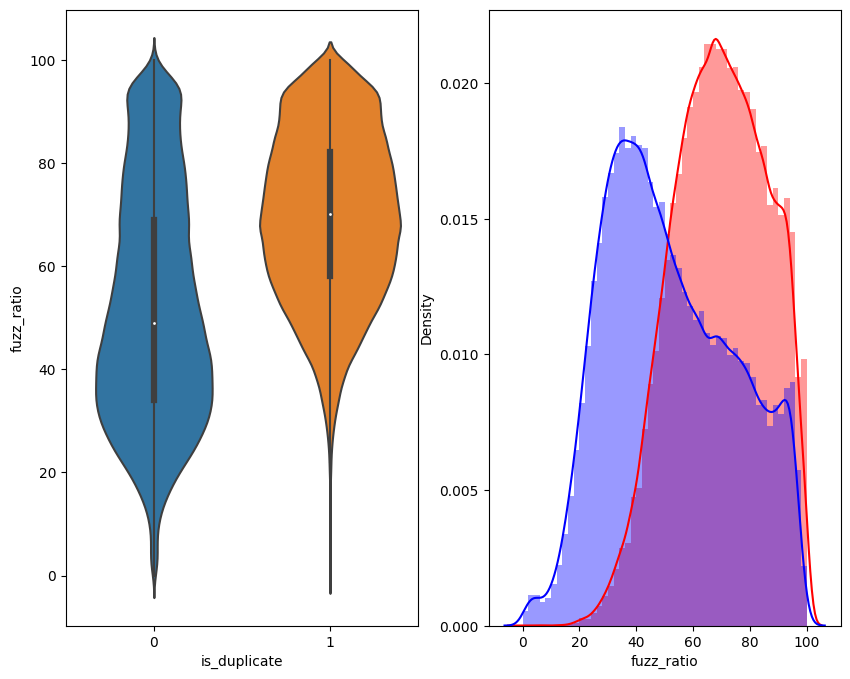

In [53]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

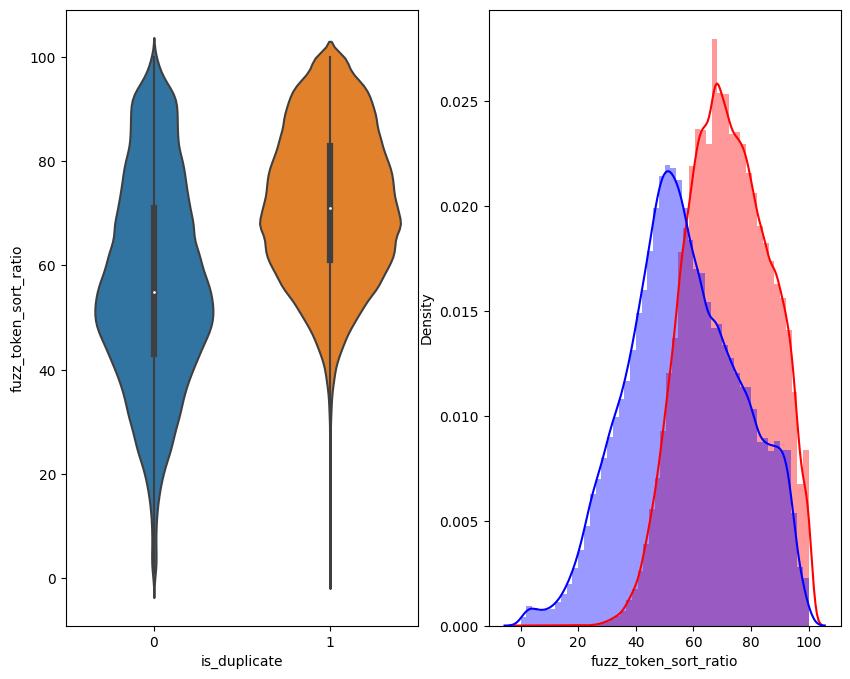

In [54]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

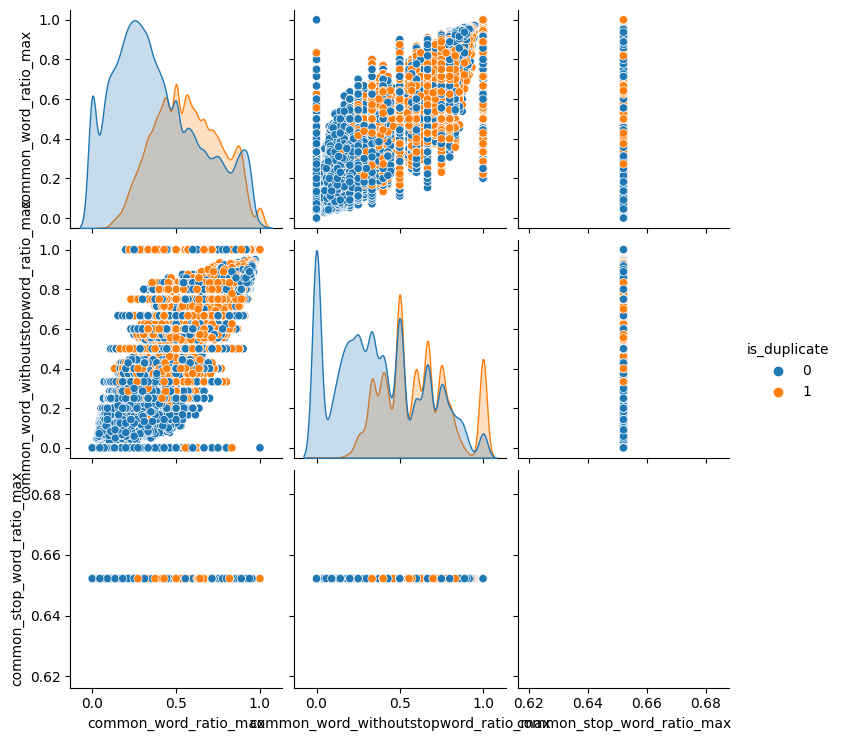

In [55]:
sns.pairplot(df[['common_word_ratio_max', 'common_word_withoutstopword_ratio_max', 'common_stop_word_ratio_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

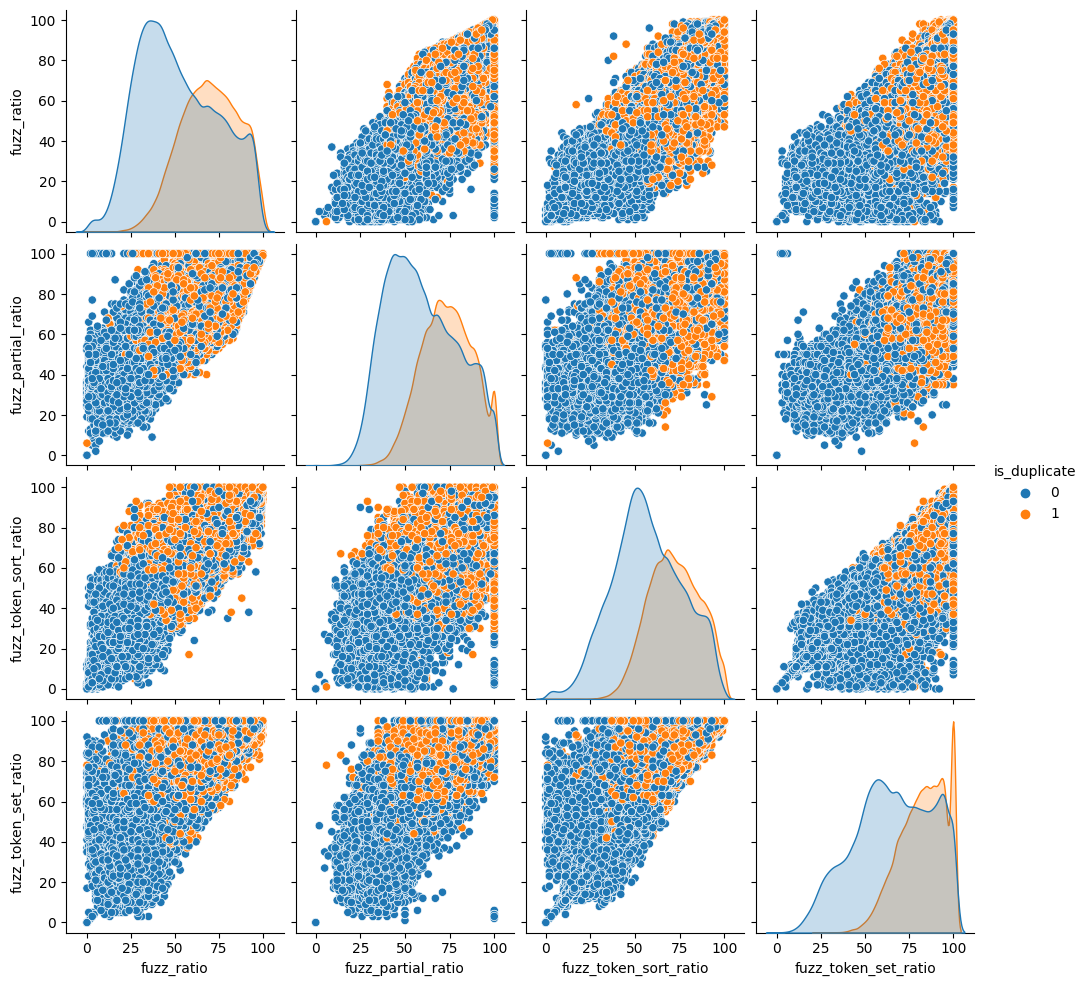

In [56]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','fuzz_token_sort_ratio','fuzz_token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

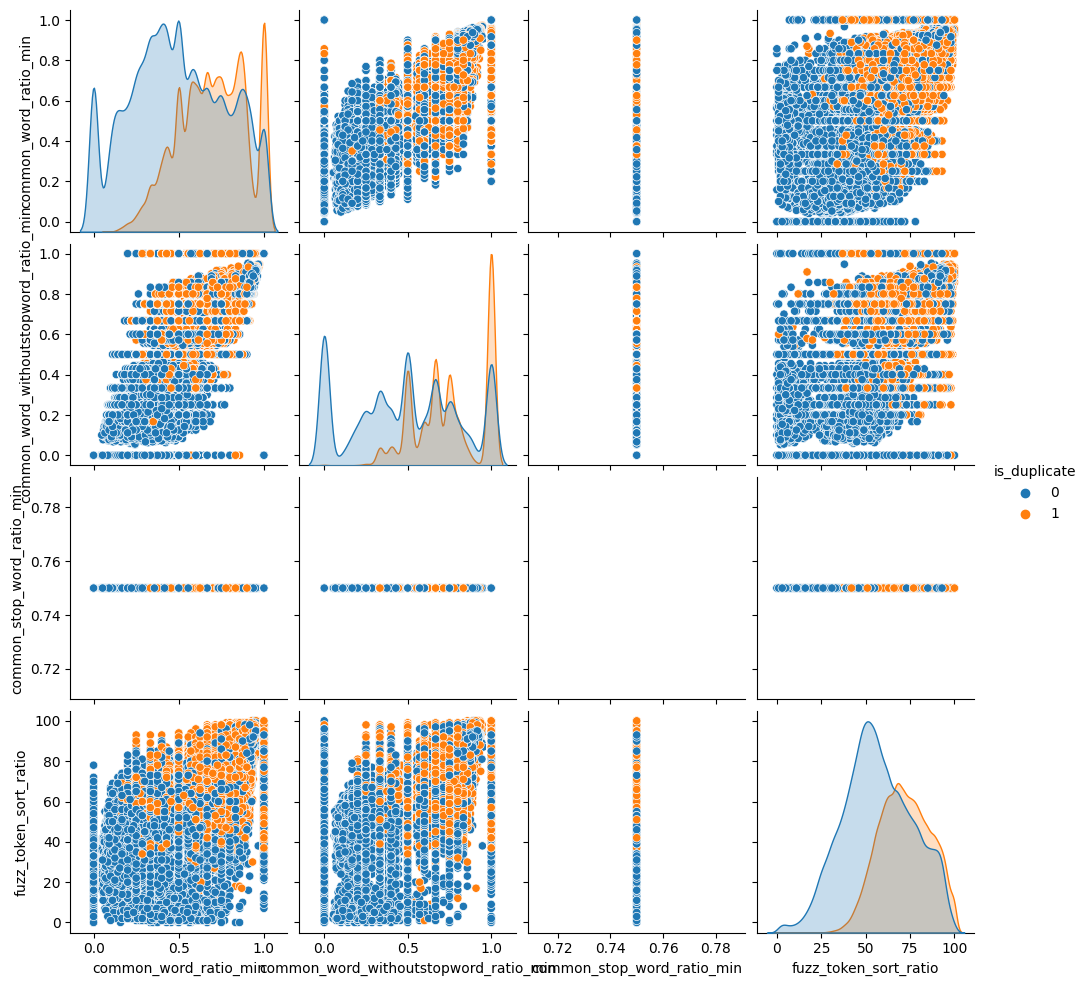

In [57]:
n = df.shape[0]
sns.pairplot(df[['common_word_withoutstopword_ratio_min', 'common_word_ratio_min', 'common_stop_word_ratio_min', 'fuzz_token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['common_word_ratio_min', 'common_word_withoutstopword_ratio_min', 'common_stop_word_ratio_min', 'fuzz_token_sort_ratio'])
plt.show()

In [58]:
file = df.copy()

In [59]:
file.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,q1_word,q2_word,total_word,differ_word_num,same_first_word,same_last_word,total_unique_word,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word,common_word_ratio,word_share,common_word_ratio_min,common_word_ratio_max,common_stop_word_ratio_min,common_stop_word_ratio_max,common_word_withoutstopword,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,0.423077,1.0,0.916667,0.749996,0.652171,5,0.833333,1.0,0.833333,93,100,100,93,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,29,5,1,0,17,11,0.586207,7,0.411765,0.241379,0.7,0.500000,0.749996,0.652171,4,0.363636,0.8,0.400000,66,74,86,63,0.588235


maximum num of characters :  621
minimum num of characters :  0
Average num of characters :  58


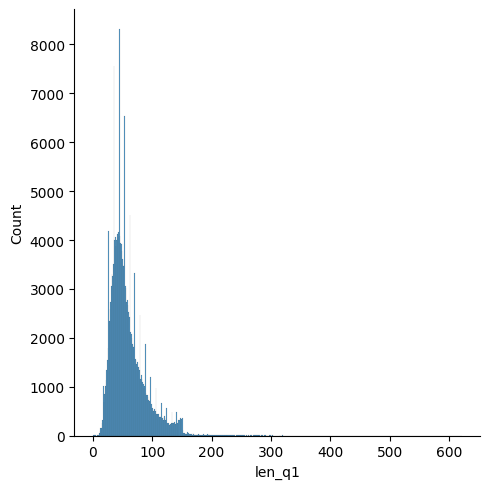

In [60]:
#Analysis of features
sns.displot(file["len_q1"])
print("maximum num of characters : ",file["len_q1"].max())
print("minimum num of characters : ",file["len_q1"].min())
print("Average num of characters : ",int(file["len_q1"].mean()))

maximum num of characters :  1170
minimum num of characters :  0
Average num of characters :  59


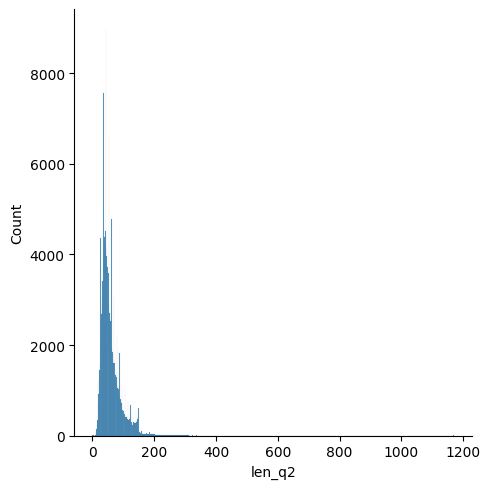

In [61]:
#Analysis of features
sns.displot(file["len_q2"])
print("maximum num of characters : ",file["len_q2"].max())
print("minimum num of characters : ",file["len_q2"].min())
print("Average num of characters : ",int(file["len_q2"].mean()))

# Apply Bag of Word (Vectorization)

- with Bag of word we can convort the text data into vector 

In [62]:
# funcation for bog of words
def BOW(data,param):
    cv = CountVectorizer(max_features=param['max_features'],binary=param['binary'])
    x = cv.fit_transform(data).toarray()
    return pd.DataFrame(x)

In [63]:
# performing BOW in on lemmatioze data set
param = {'max_features':2500,'binary':True}
bow_data_question1 = BOW(lemm_data.lemm_question1,param = param)
bow_data_question2 = BOW(lemm_data.lemm_question2,param = param)

In [64]:
bow_data_question1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

- bog of word convert word into the vectors like 0,1
- we keep the max_feature = 2500 and binary = binary so we get vectors in form of 0 and 1

In [65]:
bow_data_question1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
# renaming the colums name
lst1 = []
lst2 = []
for i in range(len(bow_data_question1.columns)):
    lst1.append(str(i)+'_x')
    lst2.append(str(i)+'_y')

In [67]:
print(bow_data_question1.shape)
bow_data_question1.columns = lst1
bow_data_question2.columns = lst2


(200000, 500)


In [68]:
# f_data = pd.concat([bow_data_question1,bow_data_question2])

In [69]:
# f_data.head(5)

# Dimensionality reducation

In [70]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'len_q1', 'len_q2', 'q1_word', 'q2_word', 'total_word',
       'differ_word_num', 'same_first_word', 'same_last_word',
       'total_unique_word', 'total_unique_word_withoutstopword_num',
       'total_unique_word_num_ratio', 'common_word', 'common_word_ratio',
       'word_share', 'common_word_ratio_min', 'common_word_ratio_max',
       'common_stop_word_ratio_min', 'common_stop_word_ratio_max',
       'common_word_withoutstopword', 'common_word_withoutstopword_ratio',
       'common_word_withoutstopword_ratio_min',
       'common_word_withoutstopword_ratio_max', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio',
       'longest_substr_ratio'],
      dtype='object')

In [71]:
# Using TSNE for Dimentionality reduction for 13 Features(Generated after cleaning the data) to 3 dimention


from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['common_word', 'common_word_ratio', 'common_word_ratio_min',
       'common_word_ratio_max', 'common_word_withoutstopword',
       'common_word_withoutstopword_ratio',
       'common_word_withoutstopword_ratio_min',
       'common_word_withoutstopword_ratio_max', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio',
       'longest_substr_ratio','common_stop_word_ratio_min','common_stop_word_ratio_max']])
y = df['is_duplicate'].values

In [72]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.275,0.916667,1.000000,0.916667,0.208333,0.833333,1.000000,0.833333,0.93,1.00,1.00,0.93,0.988410,0.0,0.0
1,0.175,0.411765,0.700000,0.500000,0.166667,0.363636,0.800000,0.400000,0.66,0.74,0.86,0.63,0.591800,0.0,0.0
2,0.100,0.200000,0.400000,0.285714,0.083333,0.222222,0.400000,0.333333,0.43,0.46,0.63,0.63,0.170519,0.0,0.0
3,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.09,0.11,0.28,0.24,0.040242,0.0,0.0
4,0.100,0.250000,0.571429,0.307692,0.083333,0.153846,0.400000,0.200000,0.35,0.55,0.67,0.47,0.154779,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.125,0.416667,0.625000,0.555556,0.125000,0.600000,0.750000,0.750000,0.60,0.68,0.70,0.66,0.546772,0.0,0.0
199996,0.125,0.384615,0.555556,0.555556,0.125000,0.600000,0.750000,0.750000,0.70,0.71,0.75,0.73,0.251515,0.0,0.0
199997,0.125,0.714286,1.000000,0.714286,0.083333,0.500000,1.000000,0.500000,0.77,0.70,1.00,0.77,0.461111,0.0,0.0
199998,0.225,0.750000,0.900000,0.818182,0.208333,0.714286,0.833333,0.833333,0.83,0.80,0.95,0.77,0.572074,0.0,0.0


### we are reduciting data set so we can visulize the data in lmplot (scatter plot)

In [73]:
#dimensionality reducation
tsne2d = TSNE(
    n_components=2,# for dimension
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200000 samples in 5.486s...
[t-SNE] Computed neighbors for 200000 samples in 303.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 200000
[t-SNE] Computed conditional probabilities for sample 2000 / 200000
[t-SNE] Computed conditional probabilities for sample 3000 / 200000
[t-SNE] Computed conditional probabilities for sample 4000 / 200000
[t-SNE] Computed conditional probabilities for sample 5000 / 200000
[t-SNE] Computed conditional probabilities for sample 6000 / 200000
[t-SNE] Computed conditional probabilities for sample 7000 / 200000
[t-SNE] Computed conditional probabilities for sample 8000 / 200000
[t-SNE] Computed conditional probabilities for sample 9000 / 200000
[t-SNE] Computed conditional probabilities for sample 10000 / 200000
[t-SNE] Computed conditional probabilities for sample 11000 / 200000
[t-SNE] Computed conditional probabilities for sample 12000 / 200000
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 130000 / 200000
[t-SNE] Computed conditional probabilities for sample 131000 / 200000
[t-SNE] Computed conditional probabilities for sample 132000 / 200000
[t-SNE] Computed conditional probabilities for sample 133000 / 200000
[t-SNE] Computed conditional probabilities for sample 134000 / 200000
[t-SNE] Computed conditional probabilities for sample 135000 / 200000
[t-SNE] Computed conditional probabilities for sample 136000 / 200000
[t-SNE] Computed conditional probabilities for sample 137000 / 200000
[t-SNE] Computed conditional probabilities for sample 138000 / 200000
[t-SNE] Computed conditional probabilities for sample 139000 / 200000
[t-SNE] Computed conditional probabilities for sample 140000 / 200000
[t-SNE] Computed conditional probabilities for sample 141000 / 200000
[t-SNE] Computed conditional probabilities for sample 142000 / 200000
[t-SNE] Computed conditional probabilities for sample 143000 / 200000
[t-SNE] Computed con

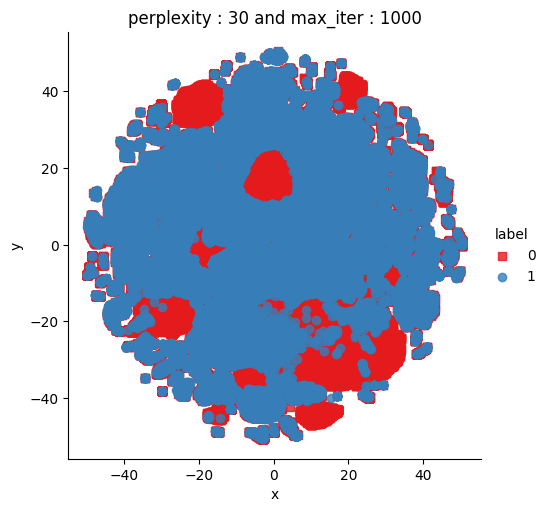

In [74]:
two_data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=two_data, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

# Glove

In [75]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\admin\appdata\local\programs\python\python38\lib\site-packages (4.3.0)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [76]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.3.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [77]:
wv = api.load('glove-twitter-50')

In [78]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [79]:
# vocabulary size and word embedding shape
print(len(wv.index_to_key))

1193514


In [80]:
def document_vector_pretrained(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [81]:
df['doc_vector_pretrained_glove'] = df.tokenised_sentences.apply(lambda x : document_vector_pretrained(x, wv))

df.head()

AttributeError: 'DataFrame' object has no attribute 'tokenised_sentences'

## Featurizing text data with tfidf weighted word-vectors

In [82]:
# avoid decoding problems
df = pd.read_csv("train.csv") #data file
df = df.head(200000)
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [83]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [84]:
clean_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [85]:
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity.

In [86]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [87]:
!python -m spacy download en_core_web_sm'


[x] No compatible package found for 'en_core_web_sm'' (spaCy v3.4.4)



In [88]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


You should consider upgrading via the 'C:\Users\admin\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [89]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [97]:
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.


ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /explosion/spacy-models/master/compatibility.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001AA84665E20>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.

if os.path.isfile('vectorize_data_question1.csv'):
    pass
else:
    nlp = spacy.load('en_core_web_sm')

    vecs1 =[]
    # tqdm is used to print the progress bar

    for qu1 in tqdm(list(df['question1'])):
        doc1 = nlp(qu1)
        #384 is the number of dimensions of vectors
        mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)]) 
        for word1 in doc1:
            #word2vec
            vec1 = word1.vector
            #fetch df score
            try:
                  idf = word2tfidf[str(word1)]
            except:
                  idf = 0

            # compute final vec
            mean_vec1 += vec1 * idf
        mean_vec1 = mean_vec1.mean(axis= 0)
        vecs1.append(mean_vec1)

    df['q1_feats_m'] = list(vecs1)


In [92]:
# we saving the file in csv formate

if os.path.isfile('vectorize_data_question1.csv'):
    df2_q1 = pd.read_csv('vectorize_data_question1.csv')
else:
    df2 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
    df2_q1 = pd.DataFrame(df2.q1_feats_m.values.tolist(), index= df2.index)
    df2_q1.to_csv('vectorize_data_question1.csv',index=False)


In [93]:
df2_q1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,28.584402,-6.810086,27.855615,-35.315542,-13.586912,2.730326,-34.105876,-39.767473,13.900935,7.672740,0.641778,-0.765477,28.145439,-2.264728,5.655208,5.971944,18.517320,-1.715917,-15.077514,13.616427,8.819330,-6.305780,3.767703,22.886510,-11.773658,-9.755625,-5.578303,39.072063,13.726358,-18.054730,-12.358459,4.851160,-69.184756,-38.117743,30.007200,-1.810211,-25.160094,18.138509,-26.894987,9.780964,25.120164,38.177591,-13.287724,-33.919206,3.143868,18.757007,11.686273,26.340756,-1.989345,-35.941123,7.966694,2.965475,-11.969356,9.041366,-2.382142,0.323651,51.398079,-14.784704,-16.961917,10.548364,-48.758126,-24.883098,-8.384710,-27.713462,-24.145514,-25.204858,7.169958,22.476285,-55.899976,-41.242732,-7.157700,5.723163,-9.099430,23.379146,-34.773107,37.491101,-7.456642,13.142562,-56.748803,61.511512,30.083835,-20.305656,28.746790,15.894951,33.684855,41.601186,21.602781,-1.591913,-26.115264,14.414840,-43.684117,-52.18990,39.665723,65.329842,3.649918,2.122465
1,79.080849,14.107694,8.520266,-10.553111,-32.166590,41.386397,-47.917305,-4.522398,23.617309,-9.829506,23.483189,-20.742570,-11.099756,13.981426,2.977810,11.773103,37.375754,59.037361,47.159374,-14.669780,-2.642009,-12.336495,-42.967712,0.712253,40.377295,-34.573235,-3.542091,52.623568,-32.192715,41.487483,-13.677313,23.379273,-42.529635,-49.782649,-30.145551,31.034654,9.343670,7.498155,-7.309810,-13.803585,-23.477777,17.341671,-35.253634,-33.499193,16.839003,-48.358129,74.380764,3.906059,3.093371,-17.238353,-14.786901,-10.872430,-38.855665,-40.655606,5.876373,-6.866400,12.437603,11.704867,-28.369161,13.006251,-11.152687,-20.464396,50.959905,-42.049006,29.483558,-20.864910,11.049153,-13.339545,25.536629,-52.227234,6.337987,-8.129083,30.962536,9.381715,-63.618797,22.610319,-29.754662,67.522776,-34.604001,32.672030,-5.378489,-24.173940,40.051975,-11.788197,11.125258,9.364189,9.564838,-9.565103,-65.431025,7.854221,7.178158,-45.15246,-18.237789,46.430513,27.637572,25.620162


In [94]:
if os.path.isfile('vectorize_data_question2.csv'):
    pass
else:    
    vecs2 = []
    for qu2 in tqdm(list(df['question2'])):
        doc2 = nlp(qu2) 
        mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
        for word2 in doc2:
            # word2vec
            vec2 = word2.vector
            # fetch df score
            try:
                idf = word2tfidf[str(word2)]
            except:
                #print word
                idf = 0
            # compute final vec
            mean_vec2 += vec2 * idf
        mean_vec2 = mean_vec2.mean(axis=0)
        vecs2.append(mean_vec2)
    df['q2_feats_m'] = list(vecs2)

100%|██████████████████████████████████████████████████████████████████████████| 200000/200000 [44:24<00:00, 75.05it/s]


In [95]:
if os.path.isfile('vectorize_data_question2.csv'):
    df2_q2 = pd.read_csv('vectorize_data_question2.csv')
    pass
else:
    df2 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
    df2_q2 = pd.DataFrame(df2.q2_feats_m.values.tolist(), index= df2.index)
    df2_q2.to_csv('vectorize_data_question2.csv',index=False)


In [96]:
df2_q2.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,24.154500,-4.457607,16.385846,-28.562836,-8.29741,1.848916,-16.383687,-35.081874,4.899365,1.227421,2.806254,2.398407,33.317355,-2.032519,11.571136,-4.439785,22.097932,-3.457452,-18.462630,20.313047,12.339846,-0.720803,11.154415,-0.203943,-5.475907,-9.905064,-4.115255,34.645166,23.529339,-26.364939,-17.473108,1.364435,-63.716510,-24.722415,28.016455,-7.796437,-14.546985,11.400523,-18.316586,5.498658,25.194800,37.046645,-4.435383,-33.628223,-13.239554,26.930090,3.497074,22.616196,5.414491,-23.627631,-6.375055,-0.851648,-6.960241,3.668319,-4.976761,-1.232078,54.316813,-24.984415,-2.682911,21.722765,-45.667802,-16.674119,-9.415567,-32.916818,-28.389496,-20.991021,0.425144,16.366809,-59.572688,-39.429385,-3.183259,4.954611,6.311392,14.672022,-27.068374,43.735624,-0.586726,10.560114,-45.874745,60.287529,19.932016,-21.098724,27.913536,21.638023,18.304952,32.872975,28.346241,1.382182,-11.913065,11.057985,-46.363138,-48.204198,43.853045,34.963427,9.033302,-10.391441
1,69.356652,22.441001,2.013355,7.549735,3.26533,64.129362,-49.540174,-2.889108,31.791875,-10.958988,5.710844,2.087674,-41.695566,-1.355553,-3.577624,32.966454,63.791381,26.747477,12.635607,-4.088756,23.806612,3.579822,-13.815884,-21.149804,48.023022,8.548406,23.124214,39.235667,-41.961246,27.342439,5.316557,-0.012833,-51.491098,-17.114823,-49.632405,11.736583,-9.130339,-4.035825,-21.812950,-16.044057,-31.254347,29.447151,-4.332561,-87.868710,-3.543700,-0.704474,60.180268,2.105614,-12.120567,-2.305375,-10.253762,-14.096019,-44.646739,-19.950037,-5.852992,-27.007214,35.119300,-48.329373,-34.884182,-8.352682,10.460899,-19.908757,57.194944,-75.273805,-9.466587,-17.343282,9.505667,8.117254,13.538661,-63.054063,22.283991,6.567744,38.253621,6.656825,-76.437293,49.434397,-21.510937,44.227353,-47.292197,10.693034,-3.892989,-40.680335,59.595581,-5.179403,-19.644024,20.976646,9.446672,-5.307196,-39.175819,14.386590,-2.633459,-40.605263,-7.723580,31.676908,48.630524,7.079052


# Data Reading

In [98]:
# reading data from "data " folder
feature_data = pd.read_csv('extract_feature.csv')
question1_vec = pd.read_csv('vectorize_data_question1.csv')
question2_vec = pd.read_csv('vectorize_data_question2.csv')

In [99]:
# dataframe of nlp features
feature_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,len_q1,len_q2,q1_word,q2_word,total_word,differ_word_num,same_first_word,same_last_word,total_unique_word,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word,common_word_ratio,word_share,common_word_ratio_min,common_word_ratio_max,common_stop_word_ratio_min,common_stop_word_ratio_max,common_word_withoutstopword,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,0.423077,1.0,0.916667,0.749996,0.652171,5,0.833333,1.0,0.833333,93,100,100,93,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,12,17,29,5,1,0,17,11,0.586207,7,0.411765,0.241379,0.7,0.500000,0.749996,0.652171,4,0.363636,0.8,0.400000,66,74,86,63,0.588235


In [100]:
feature_data_pr = feature_data.drop(['qid1','qid2','question1','question2','is_duplicate'], axis=1)

In [101]:
print(feature_data_pr.shape)
feature_data_pr.head(2)

(200000, 28)


,id,len_q1,len_q2,q1_word,q2_word,total_word,differ_word_num,same_first_word,same_last_word,total_unique_word,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word,common_word_ratio,word_share,common_word_ratio_min,common_word_ratio_max,common_stop_word_ratio_min,common_stop_word_ratio_max,common_word_withoutstopword,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio
0,0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,0.423077,1.0,0.916667,0.749996,0.652171,5,0.833333,1.0,0.833333,93,100,100,93,0.982456
1,1,50,87,12,17,29,5,1,0,17,11,0.586207,7,0.411765,0.241379,0.7,0.500000,0.749996,0.652171,4,0.363636,0.8,0.400000,66,74,86,63,0.588235


In [102]:
# Questions 1 tfidf weighted word2vec
question1_vec.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,28.584402,-6.810086,27.855615,-35.315542,-13.586912,2.730326,-34.105876,-39.767473,13.900935,7.672740,0.641778,-0.765477,28.145439,-2.264728,5.655208,5.971944,18.517320,-1.715917,-15.077514,13.616427,8.819330,-6.305780,3.767703,22.886510,-11.773658,-9.755625,-5.578303,39.072063,13.726358,-18.054730,-12.358459,4.851160,-69.184756,-38.117743,30.007200,-1.810211,-25.160094,18.138509,-26.894987,9.780964,25.120164,38.177591,-13.287724,-33.919206,3.143868,18.757007,11.686273,26.340756,-1.989345,-35.941123,7.966694,2.965475,-11.969356,9.041366,-2.382142,0.323651,51.398079,-14.784704,-16.961917,10.548364,-48.758126,-24.883098,-8.384710,-27.713462,-24.145514,-25.204858,7.169958,22.476285,-55.899976,-41.242732,-7.157700,5.723163,-9.099430,23.379146,-34.773107,37.491101,-7.456642,13.142562,-56.748803,61.511512,30.083835,-20.305656,28.746790,15.894951,33.684855,41.601186,21.602781,-1.591913,-26.115264,14.414840,-43.684117,-52.18990,39.665723,65.329842,3.649918,2.122465
1,79.080849,14.107694,8.520266,-10.553111,-32.166590,41.386397,-47.917305,-4.522398,23.617309,-9.829506,23.483189,-20.742570,-11.099756,13.981426,2.977810,11.773103,37.375754,59.037361,47.159374,-14.669780,-2.642009,-12.336495,-42.967712,0.712253,40.377295,-34.573235,-3.542091,52.623568,-32.192715,41.487483,-13.677313,23.379273,-42.529635,-49.782649,-30.145551,31.034654,9.343670,7.498155,-7.309810,-13.803585,-23.477777,17.341671,-35.253634,-33.499193,16.839003,-48.358129,74.380764,3.906059,3.093371,-17.238353,-14.786901,-10.872430,-38.855665,-40.655606,5.876373,-6.866400,12.437603,11.704867,-28.369161,13.006251,-11.152687,-20.464396,50.959905,-42.049006,29.483558,-20.864910,11.049153,-13.339545,25.536629,-52.227234,6.337987,-8.129083,30.962536,9.381715,-63.618797,22.610319,-29.754662,67.522776,-34.604001,32.672030,-5.378489,-24.173940,40.051975,-11.788197,11.125258,9.364189,9.564838,-9.565103,-65.431025,7.854221,7.178158,-45.15246,-18.237789,46.430513,27.637572,25.620162


In [103]:
# Questions 2 tfidf weighted word2vec
question2_vec.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,24.154500,-4.457607,16.385846,-28.562836,-8.29741,1.848916,-16.383687,-35.081874,4.899365,1.227421,2.806254,2.398407,33.317355,-2.032519,11.571136,-4.439785,22.097932,-3.457452,-18.462630,20.313047,12.339846,-0.720803,11.154415,-0.203943,-5.475907,-9.905064,-4.115255,34.645166,23.529339,-26.364939,-17.473108,1.364435,-63.716510,-24.722415,28.016455,-7.796437,-14.546985,11.400523,-18.316586,5.498658,25.194800,37.046645,-4.435383,-33.628223,-13.239554,26.930090,3.497074,22.616196,5.414491,-23.627631,-6.375055,-0.851648,-6.960241,3.668319,-4.976761,-1.232078,54.316813,-24.984415,-2.682911,21.722765,-45.667802,-16.674119,-9.415567,-32.916818,-28.389496,-20.991021,0.425144,16.366809,-59.572688,-39.429385,-3.183259,4.954611,6.311392,14.672022,-27.068374,43.735624,-0.586726,10.560114,-45.874745,60.287529,19.932016,-21.098724,27.913536,21.638023,18.304952,32.872975,28.346241,1.382182,-11.913065,11.057985,-46.363138,-48.204198,43.853045,34.963427,9.033302,-10.391441
1,69.356652,22.441001,2.013355,7.549735,3.26533,64.129362,-49.540174,-2.889108,31.791875,-10.958988,5.710844,2.087674,-41.695566,-1.355553,-3.577624,32.966454,63.791381,26.747477,12.635607,-4.088756,23.806612,3.579822,-13.815884,-21.149804,48.023022,8.548406,23.124214,39.235667,-41.961246,27.342439,5.316557,-0.012833,-51.491098,-17.114823,-49.632405,11.736583,-9.130339,-4.035825,-21.812950,-16.044057,-31.254347,29.447151,-4.332561,-87.868710,-3.543700,-0.704474,60.180268,2.105614,-12.120567,-2.305375,-10.253762,-14.096019,-44.646739,-19.950037,-5.852992,-27.007214,35.119300,-48.329373,-34.884182,-8.352682,10.460899,-19.908757,57.194944,-75.273805,-9.466587,-17.343282,9.505667,8.117254,13.538661,-63.054063,22.283991,6.567744,38.253621,6.656825,-76.437293,49.434397,-21.510937,44.227353,-47.292197,10.693034,-3.892989,-40.680335,59.595581,-5.179403,-19.644024,20.976646,9.446672,-5.307196,-39.175819,14.386590,-2.633459,-40.605263,-7.723580,31.676908,48.630524,7.079052


In [104]:
pd.options.display.max_rows = None

In [106]:
# final Data set
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    feature_data_pr
    question1_vec['id']=feature_data_pr['id']
    question2_vec['id']=feature_data_pr['id']
    df1  = question1_vec.merge(question2_vec, on='id',how='left')
    final  = feature_data_pr.merge(df1, on='id',how='left')
    final.to_csv('final_features.csv',index=False)

In [107]:
# reading final dataset 
final_data = pd.read_csv('final_features.csv')

In [108]:
final_data = final_data.head(100000)

In [109]:
final_data.shape

(100000, 220)

In [110]:
final_data = final_data.dropna()

In [111]:
final_data.head(5)

,id,len_q1,len_q2,q1_word,q2_word,total_word,differ_word_num,same_first_word,same_last_word,total_unique_word,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word,common_word_ratio,word_share,common_word_ratio_min,common_word_ratio_max,common_stop_word_ratio_min,common_stop_word_ratio_max,common_word_withoutstopword,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,44_x,45_x,46_x,47_x,48_x,49_x,50_x,51_x,52_x,53_x,54_x,55_x,56_x,57_x,58_x,59_x,60_x,61_x,62_x,63_x,64_x,65_x,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,74_x,75_x,76_x,77_x,78_x,79_x,80_x,81_x,82_x,83_x,84_x,85_x,86_x,87_x,88_x,89_x,90_x,91_x,92_x,93_x,94_x,95_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,51_y,52_y,53_y,54_y,55_y,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,0.423077,1.000000,0.916667,0.749996,0.652171,5,0.833333,1.0,0.833333,93,100,100,93,0.982456,28.584402,-6.810086,27.855615,-35.315542,-13.586912,2.730326,-34.105876,-39.767473,13.900935,7.672740,0.641778,-0.765477,28.145439,-2.264728,5.655208,5.971944,18.517320,-1.715917,-15.077514,13.616427,8.819330,-6.305780,3.767703,22.886510,-11.773658,-9.755625,-5.578303,39.072063,13.726358,-18.054730,-12.358459,4.851160,-69.184756,-38.117743,30.007200,-1.810211,-25.160094,18.138509,-26.894987,9.780964,25.120164,38.177591,-13.287724,-33.919206,3.143868,18.757007,11.686273,26.340756,-1.989345,-35.941123,7.966694,2.965475,-11.969356,9.041366,-2.382142,0.323651,51.398079,-14.784704,-16.961917,10.548364,-48.758126,-24.883098,-8.384710,-27.713462,-24.145514,-25.204858,7.169958,22.476285,-55.899976,-41.242732,-7.157700,5.723163,-9.099430,23.379146,-34.773107,37.491101,-7.456642,13.142562,-56.748803,61.511512,30.083835,-20.305656,28.746790,15.894951,33.684855,41.601186,21.602781,-1.591913,-26.115264,14.414840,-43.684117,-52.189900,39.665723,65.329842,3.649918,2.122465,24.154500,-4.457607,16.385846,-28.562836,-8.297410,1.848916,-16.383687,-35.081874,4.899365,1.227421,2.806254,2.398407,33.317355,-2.032519,11.571136,-4.439785,22.097932,-3.457452,-18.462630,20.313047,12.339846,-0.720803,11.154415,-0.203943,-5.475907,-9.905064,-4.115255,34.645166,23.529339,-26.364939,-17.473108,1.364435,-63.716510,-24.722415,28.016455,-7.796437,-14.546985,11.400523,-18.316586,5.498658,25.194800,37.046645,-4.435383,-33.628223,-13.239554,26.930090,3.497074,22.616196,5.414491,-23.627631,-6.375055,-0.851648,-6.960241,3.668319,-4.976761,-1.232078,54.316813,-24.984415,-2.682911,21.722765,-45.667802,-16.674119,-9.415567,-32.916818,-28.389496,-20.991021,0.425144,16.366809,-59.572688,-39.429385,-3.183259,4.954611,6.311392,14.672022,-27.068374,43.735624,-0.586726,10.560114,-45.874745,60.287529,19.932016,-21.098724,27.913536,21.638023,18.304952,32.872975,28.346241,1.382182,-11.913065,11.057985,-46.363138,-48.204198,43.853045,34.963427,9.033302,-10.391441
1,1,50,87,12,17,29,5,1,0,17,11,0.586207,7,0.411765,0.241379,0.700000,0.500000,0.749996,0.652171,4,0.363636,0.8,0.400000,66,74,86,63,0.588235,79.080849,14.107694,8.520266,-10.553111,-32.166590,41.386397,-47.917305,-4.522398,23.617309,-9.829506,23.483189,-20.742570,-11.099756,13.981426,2.977810,11.773103,37.375754,59.037361,47.159374,-14.669780,-2.642009,-12.336495,-42.967712,0.712253,40.377295,-34.573235,-3.542091,52.6235

In [112]:
final_data.shape

(100000, 220)

In [113]:
# function for creating pickle file 
import pickle
def dump_pickle(model,path):
    filepath =path
    pickle.dump(model, open(filepath, 'wb'))
    print('object conver into pikle file')

## Data split into train and test data set (75:25)

In [114]:
# target column
target_column = feature_data.is_duplicate.iloc[:len(final_data)]

In [115]:
target_column .shape

(100000,)

In [116]:
x_train,x_test,y_train,y_test = train_test_split(final_data,target_column,test_size=0.25, random_state=42)

In [117]:
print("Number of data points in train data :",x_train.shape)
print("Number of data points in test data :",x_test.shape)

Number of data points in train data : (75000, 220)
Number of data points in test data : (25000, 220)


In [118]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    plt.figure(figsize=(20,4))
    A =(((C.T)/(C.sum(axis=1))).T)
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    B =(C/C.sum(axis=0))
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Logistic Regression with hyperparameter tuning

- SGD : - SGD Classifier implements regularised linear models with Stochastic Gradient Descent.
- Logistic Regression by default uses Gradient Descent and as such it would be better to use SGD Classifier on larger data sets.



In [119]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

2023/01/04 18:11:36 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/01/04 18:11:38 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='./mlruns/1', creation_time=1672836121929, experiment_id='1', last_update_time=1672836121929, lifecycle_stage='active', name='Quora_pair_question_problem1', tags={}>

In [120]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier

from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1] ,# learning rate
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
    }
#     paramGrid = ParameterGrid(grid)

    sgd= GridSearchCV(
        estimator=SGDClassifier(),
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    sgd.fit(x_train,y_train)
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(sgd.best_params_)

2023/01/04 18:24:07 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/ac1f470b46bb4ae7ad383eb70675cb85/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/01/04 18:24:18 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/ac1f470b46bb4ae7ad383eb70675cb85/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlfl

{'alpha': 0.01, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}


In [121]:
alpha = [10 ** x for x in range(-3, 1)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

For values of alpha =  0.001 The log loss is: 0.6634702443322688
For values of alpha =  0.01 The log loss is: 0.6093147558442666
For values of alpha =  0.1 The log loss is: 0.5798093722696273
For values of alpha =  1 The log loss is: 0.5899305269303647


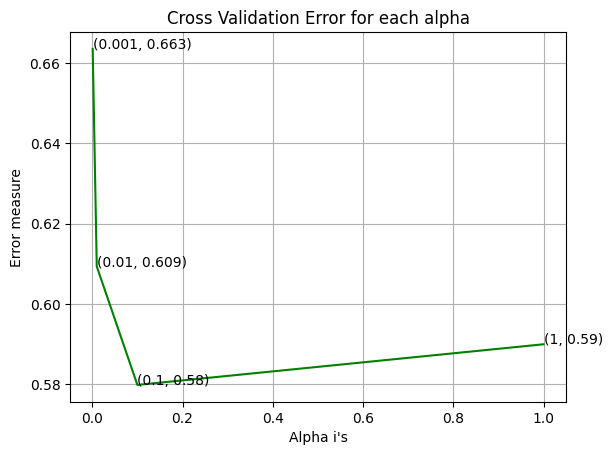

In [122]:
# ploting 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.1 The train log loss is: 0.573288798649783
For values of best alpha =  0.1 The test log loss is: 0.5798093722696273
Total number of data points : 25000


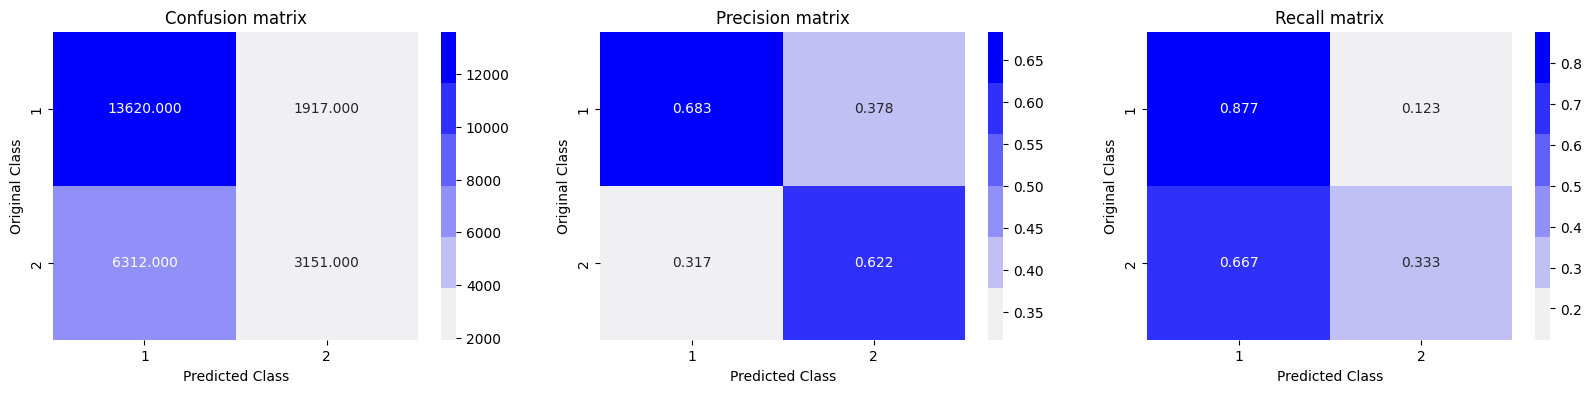

In [123]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
y_pred = sig_clf.predict(x_test)

In [124]:
print('accuracy score: ',accuracy_score(y_test,y_pred))

accuracy score:  0.67084


In [126]:
dump_pickle(sig_clf, 'logistic.pkl')

object conver into pikle file


## Linear SVM

In [127]:
# mlflow.set_tracking_uri('sqlite:///mlflow1.db')
# mlflow.set_experiment('Quora_pair_question_problem1')

In [128]:
# from sklearn.svm import SVC
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn.linear_model import SGDClassifier

# from sklearn.exceptions import FitFailedWarning 

# # enabling automatic mlflow logging for scikit_learn runs
# mlflow.sklearn.autolog(max_tuning_runs=None)

# with mlflow.start_run():
#     param_grid = {'C': [0.1, 1], 
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['rbf', 'sigmoid']} 
  
#     svm = GridSearchCV(
#         estimator=SVC(), 
#         param_grid=param_grid,
#         refit = True, 
#         verbose = 2,
#         cv = 5,
#         scoring='neg_mean_squared_error'
#         )
  
#     svm.fit(x_train,y_train)
    
#     #disabling autologging
#     mlflow.sklearn.autolog(disable=True)
#     print(svm.best_params_)

In [129]:
alpha = [10 ** x for x in range(-4, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  0.0001 The log loss is: 0.6634702443322688
For values of alpha =  0.001 The log loss is: 0.6634702443322688
For values of alpha =  0.01 The log loss is: 0.6634702443322688
For values of alpha =  0.1 The log loss is: 0.6634702443322688
For values of alpha =  1 The log loss is: 0.6170939127490221
For values of alpha =  10 The log loss is: 0.5883416594830281


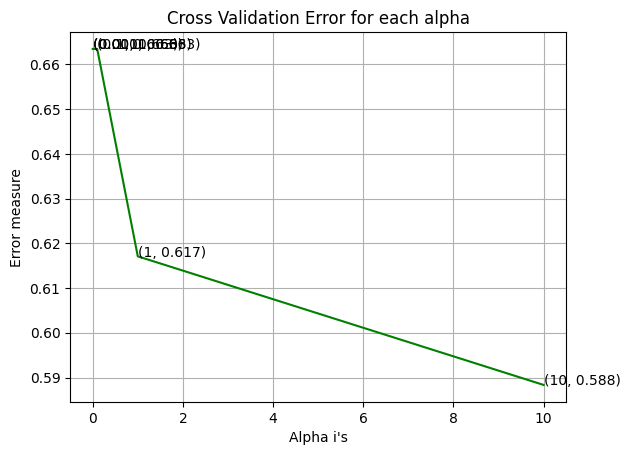

In [130]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  10 The train log loss is: 0.5837286060924423
For values of best alpha =  10 The test log loss is: 0.5883416594830281
Total number of data points : 25000


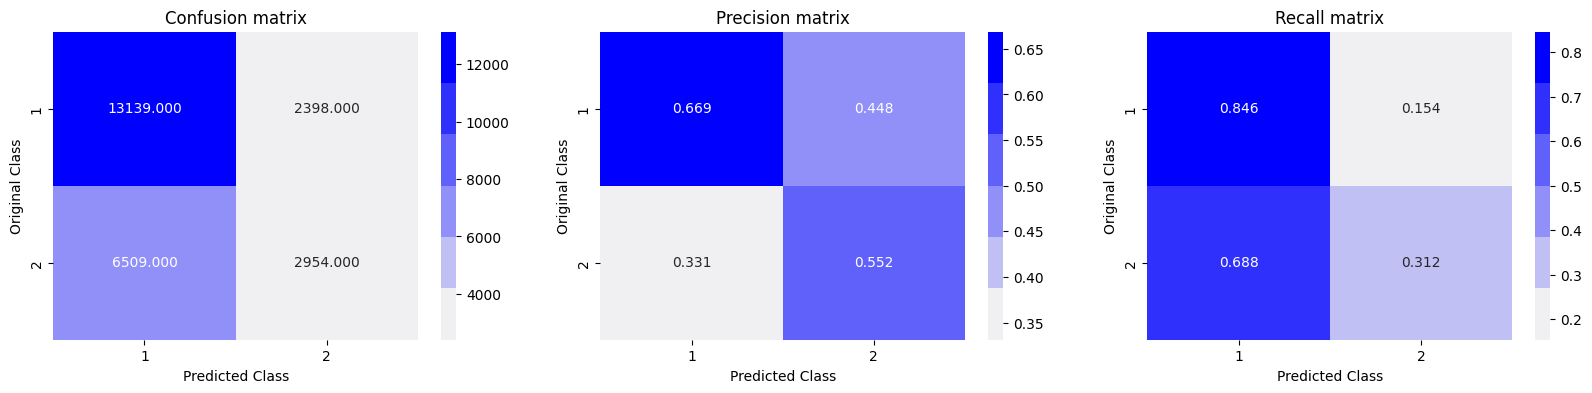

In [131]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
y_pred = sig_clf.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

Accuracy of Model:: 0.64372


In [135]:
dump_pickle(sig_clf,'svm.pkl')

object conver into pikle file


## XG BOOST

## hyperparamete tunning with XG BOOST using mlflow

In [137]:
pip install xgboost

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [138]:
import mlflow
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [139]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

<Experiment: artifact_location='./mlruns/1', creation_time=1672836121929, experiment_id='1', last_update_time=1672836121929, lifecycle_stage='active', name='Quora_pair_question_problem1', tags={}>

In [140]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {  
              'n_estimators': [40, 60, 80], 
              'max_depth': range(1, 4), 
              'learning_rate': [1e-3], 
              'min_child_weight': range(1, 4), 
             }
    
    xg = GridSearchCV(
        estimator=xgb.XGBClassifier(),
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    xg.fit(x_train,y_train)
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(xg.best_params_)

2023/01/04 19:57:29 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
             ...`
2023/01/04 21:30:28 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/c0df8e64e9dc40dfb45faaa632c51ca4/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging t

{'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 40}


In [141]:
%%time
import xgboost as xgb

param_grid = {  
              'n_estimators': [40, 60, 80], 
              'max_depth': range(1, 4), 
              'learning_rate': [1e-3], 
              'min_child_weight': range(1, 4), 
             }


grid = GridSearchCV(estimator= xgb.XGBClassifier(),
                    param_grid= param_grid,
                    scoring='neg_log_loss',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Score:  -0.6715126091543834
Best Params:  {'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 80}
CPU times: total: 7min 39s
Wall time: 1h 44min 28s


In [142]:
model = xgb.XGBClassifier(learning_rate = 0.001, max_depth = 4, min_child_weight = 3, n_estimators = 80, eval_metric = 'logloss'
)
model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [144]:
# save the model to disk
dump_pickle(model,'xgb.pkl')

object conver into pikle file


In [145]:
y_pred = model.predict(x_test)

In [146]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

Accuracy of Model:: 0.70856


In [ ]:
#print("The train log loss is:",log_loss(y_train, model.predict_proba(x_train), eps=1e-15))
#print("The test log loss is:",log_loss(y_test, y_pred, eps=1e-15))

In [ ]:
predicted_y =np.argmax(y_pred, axis= 2)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Hyperparamete tunning with Randomforest using mlflow

In [156]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [157]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

<Experiment: artifact_location='./mlruns/1', creation_time=1672836121929, experiment_id='1', last_update_time=1672836121929, lifecycle_stage='active', name='Quora_pair_question_problem1', tags={}>

In [159]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {
                  'criterion':['gini'],
                  'n_estimators':[20,50,100],
                  'min_samples_split': [2,3],
                  'min_samples_leaf':[2,3],
                  'max_leaf_nodes':[2],
                  'max_depth':[3,4,5]}
    
    RF = GridSearchCV(
        estimator=RandomForestClassifier(),
    
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    RF.fit(x_train,y_train)
    
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(RF.best_params_)

2023/01/05 00:29:16 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/5e1eb0aab7064d5ea8bc08b0a7a6e2f1/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/01/05 00:29:31 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/1/5e1eb0aab7064d5ea8bc08b0a7a6e2f1/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlfl

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [160]:
model = RandomForestClassifier(criterion='gini', max_depth = 5, n_estimators = 20, min_samples_split=3)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=20)

In [161]:
y_pred = model.predict(x_test)

In [162]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

Accuracy of Model:: 0.71448


# classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
 cl_report = classification_report(y_test,y_pred)